# Minimal example with TensorFlow 2.0
#### In this notebook we will recreate our machine learning algorithm using TF 2.0

### Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


Bad key axes.color_cycle in file /Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/ourstyle.mplstyle, line 3 ('axes.color_cycle: 19e7d8, e719ca, 191ce7, 101011, e51919, f0f214, 48f214, 1af033')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution


### Data generation

In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations, 1))
zs = np.random.uniform(low=-10, high=10, size=(observations, 1))

generated_inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1, 1, (observations, 1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

### Solving with TensorFlow

In [3]:
training_data = np.load('TF_intro.npz')

In [11]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size, 
                          kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1), 
                          bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))
])

# Define optimizer
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 29.5349
Epoch 2/100
32/32 - 0s - loss: 4.3764
Epoch 3/100
32/32 - 0s - loss: 1.4240
Epoch 4/100
32/32 - 0s - loss: 0.6374
Epoch 5/100
32/32 - 0s - loss: 0.4288
Epoch 6/100
32/32 - 0s - loss: 0.3514
Epoch 7/100
32/32 - 0s - loss: 0.3400
Epoch 8/100
32/32 - 0s - loss: 0.3380
Epoch 9/100
32/32 - 0s - loss: 0.3289
Epoch 10/100
32/32 - 0s - loss: 0.3397
Epoch 11/100
32/32 - 0s - loss: 0.3317
Epoch 12/100
32/32 - 0s - loss: 0.3270
Epoch 13/100
32/32 - 0s - loss: 0.3293
Epoch 14/100
32/32 - 0s - loss: 0.3334
Epoch 15/100
32/32 - 0s - loss: 0.3349
Epoch 16/100
32/32 - 0s - loss: 0.3343
Epoch 17/100
32/32 - 0s - loss: 0.3313
Epoch 18/100
32/32 - 0s - loss: 0.3350
Epoch 19/100
32/32 - 0s - loss: 0.3298
Epoch 20/100
32/32 - 0s - loss: 0.3292
Epoch 21/100
32/32 - 0s - loss: 0.3309
Epoch 22/100
32/32 - 0s - loss: 0.3375
Epoch 23/100
32/32 - 0s - loss: 0.3345
Epoch 24/100
32/32 - 0s - loss: 0.3446
Epoch 25/100
32/32 - 0s - loss: 0.3292
Epoch 26/100
32/32 - 0s - loss: 0

### Extract the weights and bias

In [12]:
model.layers[0].get_weights()

[array([[ 1.999273 ],
        [-3.0128691]], dtype=float32),
 array([4.9734235], dtype=float32)]

In [13]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.999273 ],
       [-3.0128691]], dtype=float32)

In [14]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9734235], dtype=float32)

### Extract the outputs (make predictions)

In [15]:
predicted_values = model.predict_on_batch(training_data['inputs']).round(1)
orignal_values = training_data['targets'].round(1)
pred_result = pd.DataFrame(zip(orignal_values, predicted_values), columns=['Original Values','Predicted Values']) 

In [16]:
pred_result

,Original Values,Predicted Values
0,[34.3],[34.1]
1,[-6.5],[-6.5]
2,[-38.4],[-37.6]
3,[24.8],[24.9]
4,[7.9],[8.6]
...,...,...
995,[4.9],[4.9]
996,[-22.8],[-23.5]
997,[-27.5],[-27.0]
998,[23.5],[23.2]


### Plotting the data

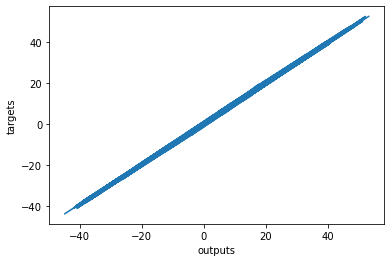

In [10]:
plt.plot(np.squeeze(predicted_values), np.squeeze(orignal_values))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()